In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
clean_df= pd.read_csv('clean_df_train.csv')

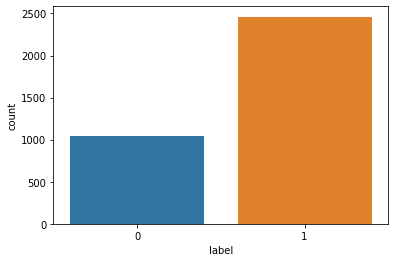

In [4]:
import seaborn as sns
sns.countplot(x='label',data=clean_df)

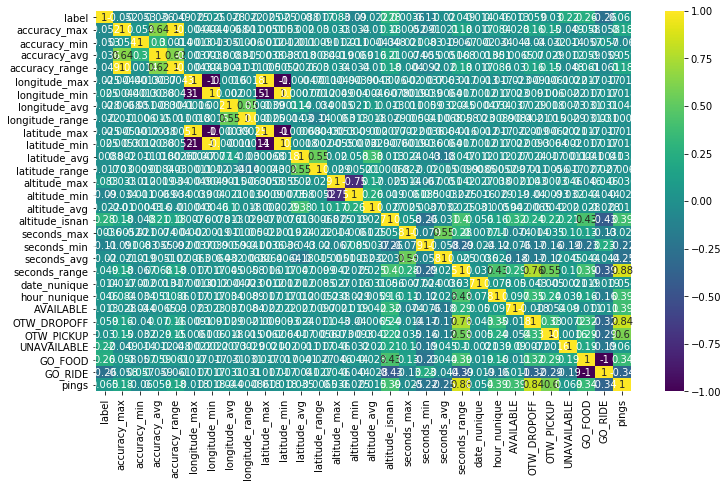

In [5]:
plt.figure(figsize=(12,7))
sns.heatmap(clean_df.corr(),annot=True,cmap='viridis') 

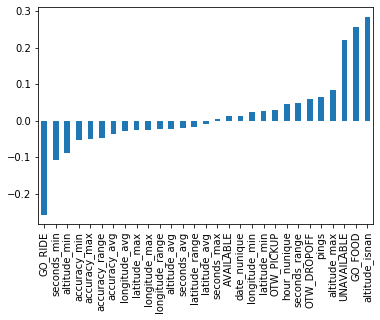

In [6]:
clean_df.corr()['label'][1:].sort_values().plot(kind='bar') 

In [7]:
x = clean_df.drop('label',axis=1).values 
y = clean_df['label'].values

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.25,random_state=101)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

In [10]:
#decision tree

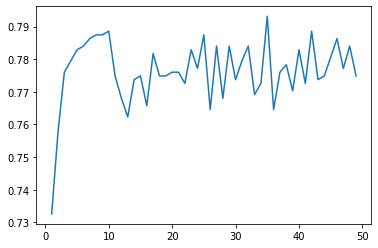

In [11]:
from sklearn.tree import DecisionTreeClassifier
scores=[]
for i in range(1,50):
  tree=DecisionTreeClassifier(max_depth = i) 
  tree.fit(x_train, y_train) 
  scores.append(tree.score(x_val,y_val)) 
plt.plot(range(1,50),scores) 
plt.show()


In [12]:
tree=DecisionTreeClassifier(max_depth = 8) 
tree.fit(x_train, y_train) 
tree.score(x_val,y_val)

0.7908571428571428

In [13]:
predictions = tree.predict(x_val) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_val,predictions)) 
print(confusion_matrix(y_val,predictions))


              precision    recall  f1-score   support

           0       0.63      0.70      0.66       258
           1       0.87      0.83      0.85       617

    accuracy                           0.79       875
   macro avg       0.75      0.76      0.76       875
weighted avg       0.80      0.79      0.79       875

[[180  78]
 [105 512]]


In [14]:
#random forest

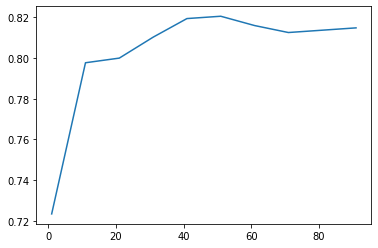

In [15]:
from sklearn.ensemble import RandomForestClassifier
scores=[]
for i in (np.arange(1,100,10)):
  classifier = RandomForestClassifier(n_estimators =i, max_depth=8, random_state =101) 
  classifier.fit(x_train, y_train) 
  scores.append(classifier.score(x_val,y_val)) 
plt.plot(np.arange(1,100,10),scores) 
plt.show()

In [16]:
classifier_forest = RandomForestClassifier(n_estimators =50,max_depth=8, random_state =101)
classifier_forest.fit(x_train, y_train)
print(classifier_forest.score(x_val,y_val))


0.8205714285714286


In [17]:
predictions = classifier_forest.predict(x_val) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_val,predictions)) 
print(confusion_matrix(y_val,predictions))


              precision    recall  f1-score   support

           0       0.68      0.73      0.71       258
           1       0.88      0.86      0.87       617

    accuracy                           0.82       875
   macro avg       0.78      0.79      0.79       875
weighted avg       0.82      0.82      0.82       875

[[189  69]
 [ 88 529]]


In [18]:
#SVM

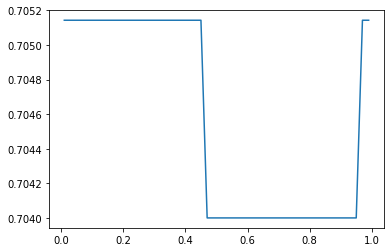

In [19]:
from sklearn.svm import SVC

scores=[]
for i in (np.arange(0.01,1,0.02)):
  classifier = SVC(kernel = 'linear', C = i)
  classifier.fit(x_train,y_train) 
  scores.append(classifier.score(x_val,y_val)) 
plt.plot(np.arange(0.01,1,0.02),scores) 
plt.show()


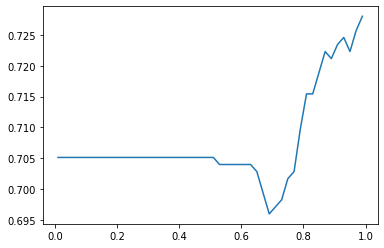

In [20]:
scores=[]
for i in (np.arange(0.01,1,0.02)):
  classifier = SVC(kernel = 'rbf', gamma=i, C = i)
  classifier.fit(x_train,y_train) 
  scores.append(classifier.score(x_val,y_val)) 
plt.plot(np.arange(0.01,1,0.02),scores) 
plt.show()

In [21]:
classifier_svm = SVC(kernel = 'rbf', gamma=1, C = 1)
classifier_svm.fit(x_train,y_train) 
classifier_svm.score(x_val,y_val) 


0.728

In [22]:
predictions = classifier_svm.predict(x_val) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_val,predictions)) 
print(confusion_matrix(y_val,predictions))

              precision    recall  f1-score   support

           0       0.60      0.22      0.33       258
           1       0.74      0.94      0.83       617

    accuracy                           0.73       875
   macro avg       0.67      0.58      0.58       875
weighted avg       0.70      0.73      0.68       875

[[ 58 200]
 [ 38 579]]


In [23]:
#KNN


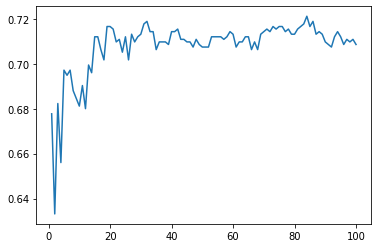

In [24]:
from sklearn.neighbors import KNeighborsClassifier

accuracies=[]
for k in range(1,101):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(x_train, y_train)
  accuracies.append(classifier.score(x_val, y_val)) 
  
k_list=list(range(1,101)) 
plt.plot(k_list,accuracies)
plt.show() 

In [25]:
classifier_knn = KNeighborsClassifier(n_neighbors =21)
classifier_knn.fit(x_train, y_train)
classifier_knn.score(x_val, y_val) 


0.7154285714285714

In [26]:
predictions = classifier_knn.predict(x_val) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_val,predictions)) 
print(confusion_matrix(y_val,predictions))


              precision    recall  f1-score   support

           0       0.54      0.26      0.35       258
           1       0.74      0.91      0.82       617

    accuracy                           0.72       875
   macro avg       0.64      0.58      0.58       875
weighted avg       0.68      0.72      0.68       875

[[ 66 192]
 [ 57 560]]


In [27]:
#ANN

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=5,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [31]:
model.fit(x_train,y_train,epochs=500,validation_data=(x_val, y_val), verbose=1,callbacks=[early_stop])

Train on 2625 samples, validate on 875 samples
Epoch 1/500
2625/2625 [==============================] - 2s 634us/sample - loss: 0.6354 - accuracy: 0.6872 - val_loss: 0.5958 - val_accuracy: 0.7051
Epoch 2/500
2625/2625 [==============================] - 0s 74us/sample - loss: 0.6223 - accuracy: 0.7006 - val_loss: 0.5880 - val_accuracy: 0.7051
Epoch 3/500
2625/2625 [==============================] - 0s 83us/sample - loss: 0.6063 - accuracy: 0.7017 - val_loss: 0.5802 - val_accuracy: 0.7051
Epoch 4/500
2625/2625 [==============================] - 0s 81us/sample - loss: 0.6177 - accuracy: 0.7017 - val_loss: 0.5777 - val_accuracy: 0.7051
Epoch 5/500
2625/2625 [==============================] - 0s 86us/sample - loss: 0.6018 - accuracy: 0.7010 - val_loss: 0.5718 - val_accuracy: 0.7051
Epoch 6/500
2625/2625 [==============================] - 0s 115us/sample - loss: 0.5947 - accuracy: 0.7021 - val_loss: 0.5704 - val_accuracy: 0.7051
Epoch 7/500
2625/2625 [==============================] - 0s 88u

Epoch 56/500
2625/2625 [==============================] - 0s 79us/sample - loss: 0.5520 - accuracy: 0.7101 - val_loss: 0.5132 - val_accuracy: 0.7074
Epoch 57/500
2625/2625 [==============================] - 0s 81us/sample - loss: 0.5416 - accuracy: 0.7177 - val_loss: 0.5108 - val_accuracy: 0.7074
Epoch 58/500
2625/2625 [==============================] - 0s 79us/sample - loss: 0.5381 - accuracy: 0.7181 - val_loss: 0.5120 - val_accuracy: 0.7074
Epoch 59/500
2625/2625 [==============================] - 0s 126us/sample - loss: 0.5452 - accuracy: 0.7173 - val_loss: 0.5127 - val_accuracy: 0.7074
Epoch 60/500
2625/2625 [==============================] - 0s 97us/sample - loss: 0.5475 - accuracy: 0.7116 - val_loss: 0.5090 - val_accuracy: 0.7074
Epoch 61/500
2625/2625 [==============================] - 0s 80us/sample - loss: 0.5390 - accuracy: 0.7147 - val_loss: 0.5111 - val_accuracy: 0.7074
Epoch 62/500
2625/2625 [==============================] - 0s 79us/sample - loss: 0.5461 - accuracy: 0.708

Epoch 111/500
2625/2625 [==============================] - 0s 79us/sample - loss: 0.5299 - accuracy: 0.7223 - val_loss: 0.4965 - val_accuracy: 0.7166
Epoch 112/500
2625/2625 [==============================] - 0s 80us/sample - loss: 0.5232 - accuracy: 0.7250 - val_loss: 0.4963 - val_accuracy: 0.7349
Epoch 113/500
2625/2625 [==============================] - 0s 78us/sample - loss: 0.5301 - accuracy: 0.7181 - val_loss: 0.4939 - val_accuracy: 0.7143
Epoch 114/500
2625/2625 [==============================] - 0s 78us/sample - loss: 0.5380 - accuracy: 0.7143 - val_loss: 0.5009 - val_accuracy: 0.7189
Epoch 115/500
2625/2625 [==============================] - 0s 76us/sample - loss: 0.5346 - accuracy: 0.7192 - val_loss: 0.4986 - val_accuracy: 0.7051
Epoch 116/500
2625/2625 [==============================] - 0s 75us/sample - loss: 0.5269 - accuracy: 0.7192 - val_loss: 0.4969 - val_accuracy: 0.7166
Epoch 117/500
2625/2625 [==============================] - 0s 78us/sample - loss: 0.5333 - accuracy:

Epoch 220/500
2625/2625 [==============================] - 0s 73us/sample - loss: 0.5225 - accuracy: 0.7234 - val_loss: 0.4912 - val_accuracy: 0.7349
Epoch 221/500
2625/2625 [==============================] - 0s 74us/sample - loss: 0.5179 - accuracy: 0.7330 - val_loss: 0.4878 - val_accuracy: 0.7337
Epoch 222/500
2625/2625 [==============================] - 0s 78us/sample - loss: 0.5333 - accuracy: 0.7208 - val_loss: 0.4896 - val_accuracy: 0.7360
Epoch 223/500
2625/2625 [==============================] - 0s 78us/sample - loss: 0.5126 - accuracy: 0.7257 - val_loss: 0.4915 - val_accuracy: 0.7257
Epoch 224/500
2625/2625 [==============================] - 0s 78us/sample - loss: 0.5232 - accuracy: 0.7139 - val_loss: 0.4914 - val_accuracy: 0.7314
Epoch 225/500
2625/2625 [==============================] - 0s 79us/sample - loss: 0.5265 - accuracy: 0.7238 - val_loss: 0.4876 - val_accuracy: 0.7314
Epoch 226/500
2625/2625 [==============================] - 0s 73us/sample - loss: 0.5204 - accuracy:

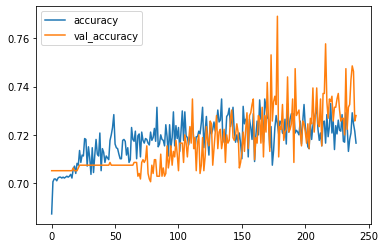

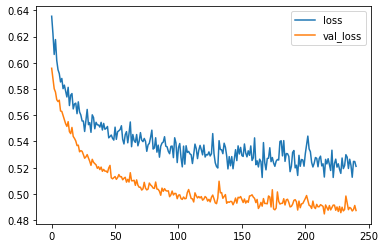

In [32]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()


In [33]:
print(model.metrics_names)
print(model.evaluate(x_val,y_val,verbose=0))

['loss', 'accuracy']
[0.4873746110030583, 0.728]


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_val)
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.66      0.16      0.26       258
           1       0.73      0.96      0.83       617

    accuracy                           0.73       875
   macro avg       0.69      0.56      0.55       875
weighted avg       0.71      0.73      0.66       875



In [35]:
#decision tree give the best performance